In [1]:
# IMPORTS
import os
import pandas as pd
import numpy as np
from utils.load_utils import import_brava_data, get_import_params
from utils.data_utils import calculate_fft, calculate_tau_ami, calculate_best_m_tau, calculate_lyapunov_exponents
from utils.dynsys_utils import calc_dim_Cao1997
import matplotlib.pyplot as plt


# JUPYTER
%matplotlib widget
%reload_ext autoreload
%autoreload 2


# KEY VARIABLES
main_dir = os.getcwd()
data_dir = main_dir + '/data'
exp_name = 'b1383'
filename = data_dir + '/' + exp_name + '.txt'
picklename = data_dir + '/' + exp_name + '.pickle'


# IMPORT PARAMS
import_params = get_import_params(exp_name)
import_params["downsample_factor"] = 50

### Import data

Importing BRAVA data...
...reading pickle...
Data head:
         V-LVDT    H-LVDT  SHEAR STRESS  NORMAL STRESS  ON BOARD LVDT  \
3340 -27.433933  5.908380      9.681116       7.496756    9115.057424   
3341 -27.434999  5.908458      9.677793       7.497069    9115.496365   
3342 -27.432972  5.908258      9.675058       7.496647    9115.355581   
3343 -27.434137  5.908373      9.682488       7.496752    9115.799851   
3344 -27.431834  5.908211      9.677856       7.496702    9115.602493   

      V Load aux         TIME        Record  NORMALISED SHEAR  
3340    0.483013  2107.002055  1.026202e+06          0.738525  
3341    0.482862  2107.052056  1.026012e+06          0.733852  
3342    0.482628  2107.102056  1.026301e+06          0.730007  
3343    0.482788  2107.152057  1.026113e+06          0.740467  
3344    0.482569  2107.202058  1.026401e+06          0.733952  


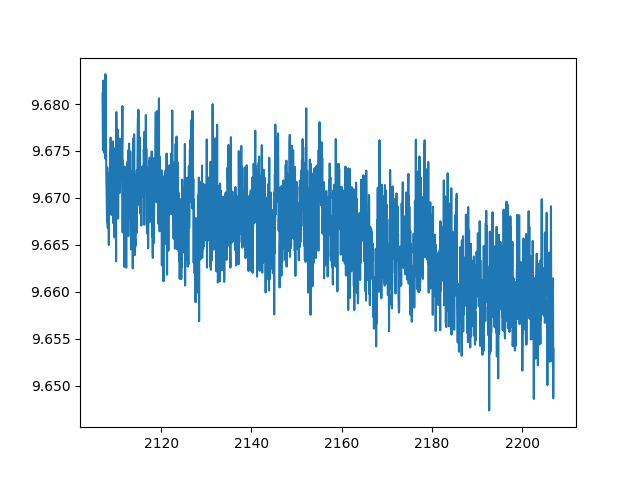

In [2]:
data = import_brava_data(filename, picklename, import_params)
data = data[3340:5340]

win = {
    "t_start": data.iloc[0].TIME,
    "t_end": data.iloc[-1].TIME,
    "i_start": data.head(1).index.item(),
    "i_end": data.tail(1).index.item()
}

print("Data head:")
print(data.head())


plt.close("all")
plt.plot(data["TIME"], data["SHEAR STRESS"])
plt.show()

### Calculate FFT

In [ ]:
fft = calculate_fft(data)
plt.plot(fft)
plt.show()

### Calculate best tau by AMI
Auto-mutual information minimisation by Fraser and Swinney (1986).

In [ ]:
tau_ami = calculate_tau_ami(data)
print("printing tau_ami")
print(tau_ami)

### Calculating best tau by minimising Lyapunov radius
From Sano and Sawada

In [3]:
m, tau = calculate_best_m_tau(data)
print(f"\nBest m = {str(m)}, tau={str(tau)}")


Calculating best m, tau by minimising the Lyapunov radius:

Loop 1/11: tau = 1
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.39 s

Loop 2/11: tau = 5
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.38 s

Loop 3/11: tau = 10
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.35 s

Loop 4/11: tau = 15
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.33 s

Loop 5/11: tau = 20
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.26 s

Loop 6/11: tau = 25
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.30 s

Loop 7/11: tau = 30
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.20 s

Loop 8/11: tau = 35
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.18 s

Loop 9/11: tau = 40
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.17 s

Loop 10/11: tau = 45
E2 ~ const.: stochastic time series (m = nan); Calculation time: 1.11 s

Loop 11/11

### Plot attractor

In [ ]:
# plot_attractor(data, m, tau)
from utils.dynsys_utils import embed_1dim
H = embed_1dim(data["SHEAR STRESS"], tau=int(tau), m=int(m)).T
plt.figure().add_subplot(projection='3d')
plt.plot(H[:,0], H[:,1], H[:,2])

### Calculate Lyapunov exponents

In [ ]:
LEs, kyd = calculate_lyapunov_exponents(data, m, tau)
print("Lyapunov Exponents:", LEs)
print("Kaplan-Yorke dimension:", kyd)